In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
import tensorflow as tf
print("GPUs available:", tf.config.list_physical_devices('GPU'))


GPUs available: []


In [7]:
pip install opencv-python


  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl (39.5 MB)


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import tensorflow as tf
import os

In [42]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [46]:
gpus = tf.config.experimental.list_physical_devices('CPU')
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [7]:
import cv2
import imghdr

In [9]:
data_dir = 'Data'
image_exts = ['jpeg','jpg','bmp','png']

In [11]:
os.listdir(data_dir)

['happy people', 'sad people']

In [56]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

Image not in ext list Data\happy people\67891c01e6414a49171f7cdd_670dc58a1a956551043bb21f_traitshapp.webp
Image not in ext list Data\happy people\78252134.cms
Image not in ext list Data\happy people\depositphotos_391577690-stock-photo-cheerful-woman-outstretc.jpg
Image not in ext list Data\happy people\eyJidWNrZXQiOiJvbS1wdWItc3RvcmFnZSIsImtleSI6ImFjdGl2ZWJlYXQv.webp
Image not in ext list Data\happy people\getty_152414899_97046097045006_68075.webp
Image not in ext list Data\happy people\getty_478389113_970647970450091_99776.webp
Image not in ext list Data\happy people\Happy People.jpg
Image not in ext list Data\happy people\istock-508455188-033183f45ba393ed4745b2dd1213c390.jpg
Image not in ext list Data\happy people\Joyful-Happy-People-1-jpg.webp
Image not in ext list Data\sad people\d-depressed-sad-person-rendering-frustrated-upset-man-sittin.jpg
Image not in ext list Data\sad people\depositphotos_161575148-stock-photo-african-american-man-loo.jpg
Image not in ext list Data\sad people

In [60]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [179]:
data = tf.keras.utils.image_dataset_from_directory('Data')

Found 174 files belonging to 2 classes.


In [15]:
data_iterator = data.as_numpy_iterator()

In [66]:
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x0000029827364B00>)

In [17]:
batch = data_iterator.next()

In [72]:
len(batch)

2

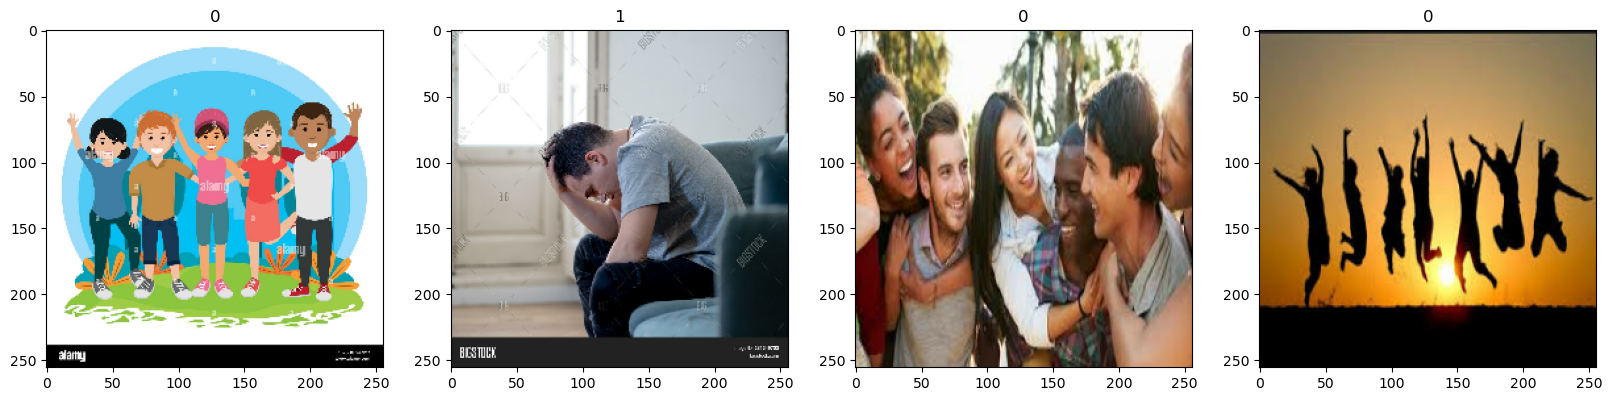

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


In [181]:
data = data.map(lambda x,y:(x/255,y))
scaled_data = data.as_numpy_iterator()
batch = scaled_data.next()

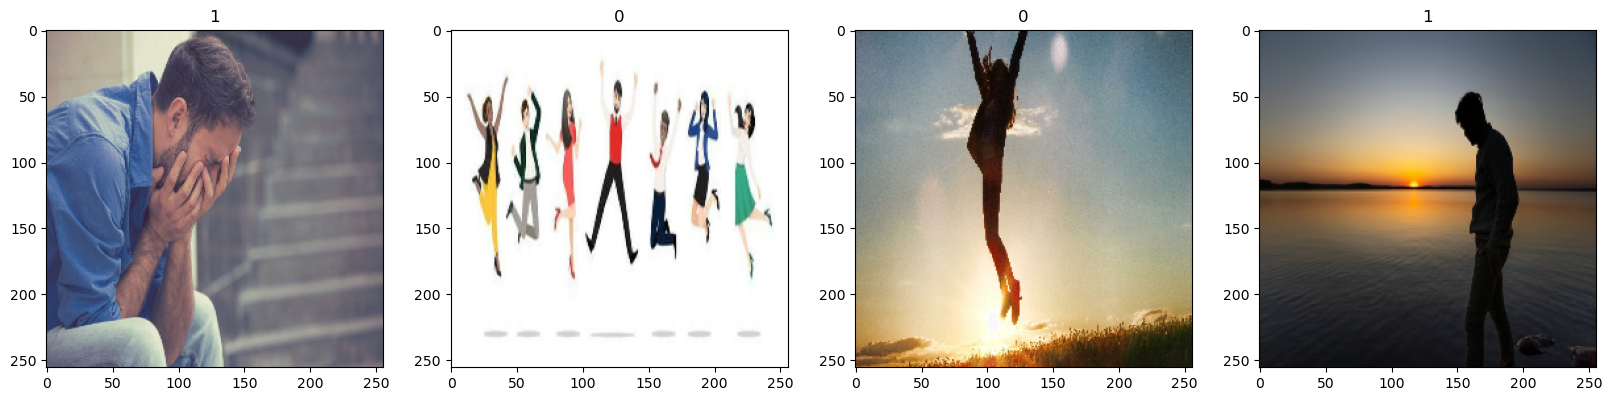

In [183]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])


In [25]:
len(data)

6

In [27]:
train_size = int(len(data)*0.7) - 1
test_size = int(len(data)*0.1) + 1
val_size = int(len(data)*0.2) + 1

In [29]:
train_size + test_size + val_size

6

In [31]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [35]:
model = Sequential()

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.compile(optimizer='adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [41]:
logdir = 'log'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [43]:
hist = model.fit(train,epochs=20,validation_data=val,callbacks = [tensorboard_callback])

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.5026 - loss: 0.9193 - val_accuracy: 0.5156 - val_loss: 0.9488
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.4740 - loss: 0.9164 - val_accuracy: 0.4844 - val_loss: 0.6455
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.5169 - loss: 0.6611 - val_accuracy: 0.5938 - val_loss: 0.6013
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.5898 - loss: 0.5885 - val_accuracy: 0.5312 - val_loss: 0.6201
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.6406 - loss: 0.5942 - val_accuracy: 0.6562 - val_loss: 0.5935
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 4s/step - accuracy: 0.7721 - loss: 0.5439 - val_accuracy: 0.8594 - val_loss: 0.4582
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.8333 - loss: 0.4785 - val_accuracy: 0.8438 - val_loss: 0.4420
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.8268 - loss: 0.4498 - val_accuracy: 0.8438 - val_loss: 0.4013
Epoch 9/20
3

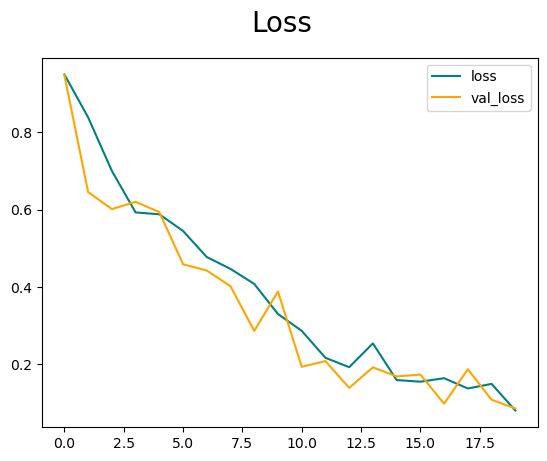

In [47]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper right')
plt.show()


In [49]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [51]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


In [55]:
pre.result().numpy()

1.0

In [57]:
re.result().numpy()

0.8

In [63]:
acc.result().numpy()

0.9285714

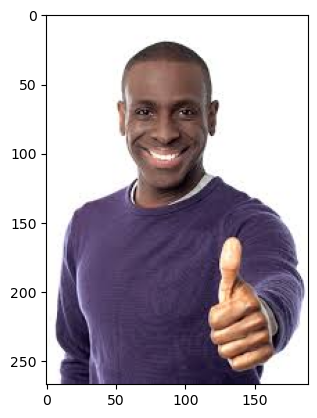

In [67]:
img = cv2.imread('happytest.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [129]:
resize = tf.image.resize(img,(256,256))

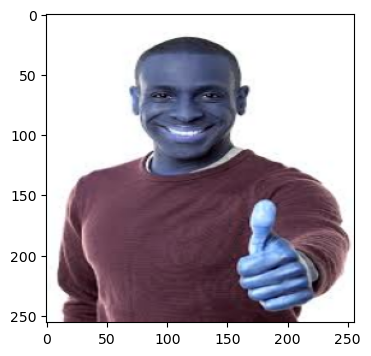

In [96]:
plt.figure(figsize=(12,4))
plt.imshow((resize.numpy()).astype(int))

In [113]:
resize_np = resize.numpy().astype('uint8')  # Ensure it's uint8 for cv2

# Convert BGR to RGB
rgb_img = cv2.cvtColor(resize_np, cv2.COLOR_BGR2RGB)

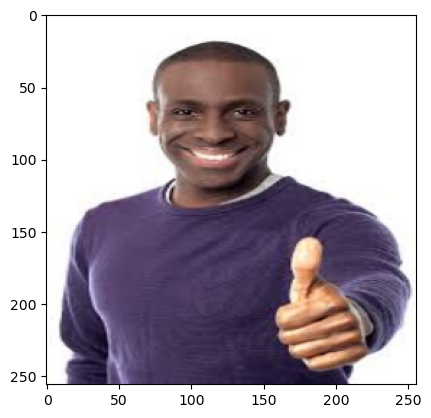

In [117]:
plt.imshow(rgb_img)

In [146]:
ywhat = model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


In [148]:
ywhat

array([[0.17251341]], dtype=float32)

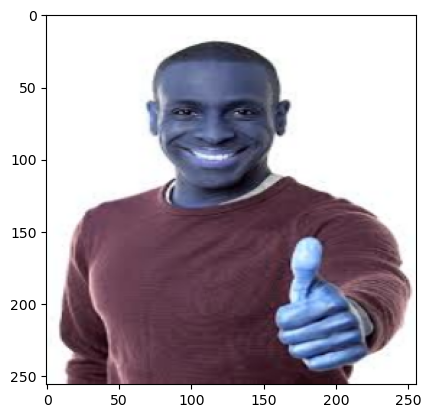

In [143]:
plt.imshow(resize.numpy().astype(int))

In [150]:
resize_np = np.array(resize)  # Ensure it's a NumPy array
ywhat = model.predict(np.expand_dims(resize_np / 255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


In [152]:
ywhat

array([[0.17251341]], dtype=float32)

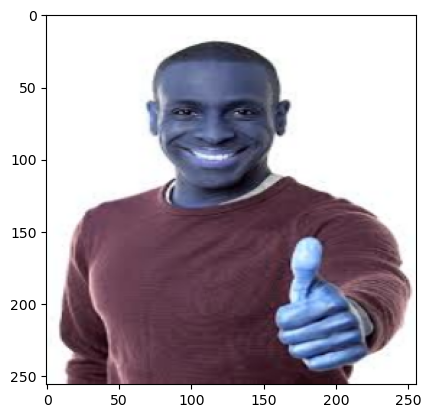

In [159]:
plt.imshow(resize.numpy().astype(int))

In [161]:
img = cv2.imread('happytest.jpg')
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [169]:
rgb_img = tf.image.resize(rgb_img,(256,256))

In [171]:
rgb_img.shape

TensorShape([256, 256, 3])

In [173]:
ywhat = model.predict(np.expand_dims(rgb_img / 255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


In [177]:
ywhat

array([[0.78043073]], dtype=float32)

In [187]:
img = cv2.imread('sadtest.jpg')
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rgb_img = tf.image.resize(rgb_img,(256,256))
ywhat = model.predict(np.expand_dims(rgb_img / 255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


In [189]:
ywhat

array([[0.94150996]], dtype=float32)

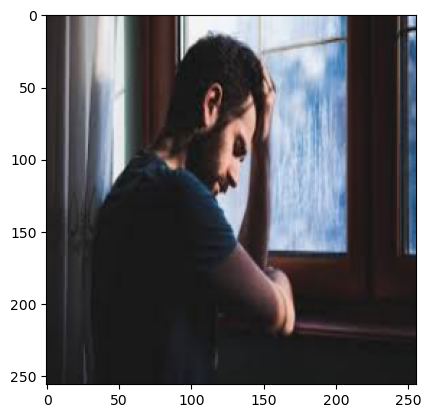

In [193]:
plt.imshow(rgb_img.numpy().astype(int))

In [5]:
from tensorflow.keras.models import load_model
import joblib
model = load_model('models/happysadmodel.h5')


In [7]:
joblib.dump(model,'happysadmodelog.pkl')

['happysadmodelog.pkl']